In [1]:
from PIL import Image
from pathlib import Path

def split_image_by_path(image_path: str, tiles: tuple) -> dict:
    image = Image.open(image_path)
    width, height = image.size

    # вычисляем размеры плиток
    col_width = width // tiles[0]
    row_height = height // tiles[1]

    # определяем границы плиток
    x = 0
    y = 0
    split_images = []
    for i in range(tiles[1]):
        for j in range(tiles[0]):
            box = (x, y, x + col_width, y + row_height)
            split_image = image.crop(box)
            split_images.append(split_image)
            x += col_width
        x = 0
        y += row_height
    
    alphabet = {}
    alphas = sorted('йцукенгшщзхъфывапролджэячсмитьбю')

    Path('alphabet_gestures').mkdir(parents=True, exist_ok=True)
    for i, image in enumerate(split_images):
        alphabet[alphas[i]] = f'alphabet_gestures/split_image_{i}.jpg'
        image.save(f'alphabet_gestures/split_image_{i}.jpg') # сохраняем плитки картинки
    alphabet[' '] = f'alphabet_gestures/split_image_{len(alphas)}.jpg'
    Image.new('RGB', (col_width, row_height), 'white').save(f'alphabet_gestures/split_image_{len(alphas)}.jpg')
    return alphabet

In [2]:
def split_image_by_image(image: Image, tiles: tuple) -> dict:
    image = image
    width, height = image.size

    # вычисляем размеры плиток
    col_width = width // tiles[0]
    row_height = height // tiles[1]

    # определяем границы плиток
    x = 0
    y = 0
    split_images = []
    for i in range(tiles[1]):
        for j in range(tiles[0]):
            box = (x, y, x + col_width, y + row_height)
            split_image = image.crop(box)
            split_images.append(split_image)
            x += col_width
        x = 0
        y += row_height
    
    alphabet = {}
    alphas = sorted('йцукенгшщзхъфывапролджэячсмитьбю')

    Path('alphabet_gestures').mkdir(parents=True, exist_ok=True)
    for i, image in enumerate(split_images):
        alphabet[alphas[i]] = f'alphabet_gestures/split_image_{i}.jpg'
        image.save(f'alphabet_gestures/split_image_{i}.jpg') # сохраняем плитки картинки
    alphabet[' '] = f'alphabet_gestures/split_image_{len(alphas)}.jpg'
    Image.new('RGB', (col_width, row_height), 'white').save(f'alphabet_gestures/split_image_{len(alphas)}.jpg')
    return alphabet

In [3]:
def convert_word(word: str, alphabet: dict) -> None:
    alphas_in_word = list(word)
    image_for_size = Image.open(alphabet['а'])
    new_image = Image.new("RGB",
                          (image_for_size.size[0]*len(alphas_in_word),
                           image_for_size.size[1]), 'white')
    for i, alpha in enumerate(alphas_in_word):
        alpha_image = Image.open(alphabet[alpha])
        new_image.paste(alpha_image, (alpha_image.size[0]*i, 0))

    display(new_image)

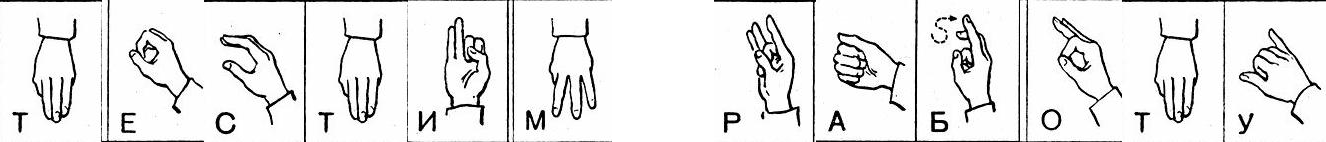

In [9]:
split_images = split_image_by_path('Alphabet gestures v2.jpg', (8, 4))
convert_word('тестим работу', split_images)
    

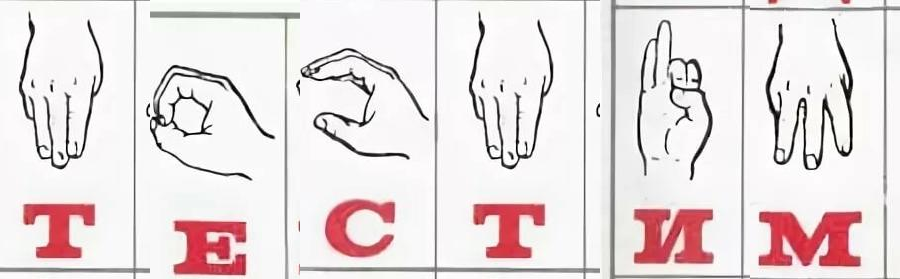

In [5]:
split_images = split_image_by_image(Image.open('Alphabet gestures.jpg'), (8, 4))
convert_word('тестим', split_images)  

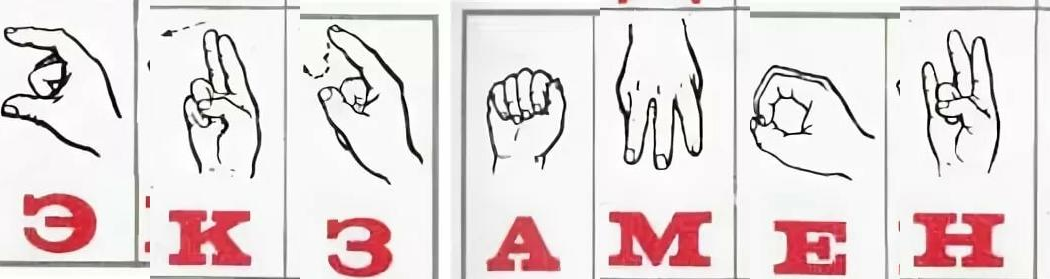

In [6]:
split_images = split_image_by_image(Image.open('Alphabet gestures.jpg'), (8, 4))

convert_word('экзамен', split_images)

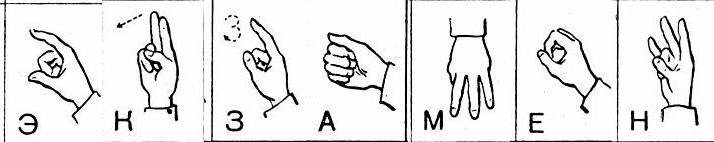

In [8]:
split_images = split_image_by_path('Alphabet gestures v2.jpg', (8, 4))
convert_word('экзамен', split_images)